In [1]:
import os
import math
import random
import cytnx as cy
from scipy.optimize import curve_fit
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [2]:
## Basic parameter
cnames = {                        
'blueviolet':           '#8A2BE2',
'brown':                '#A52A2A',
'burlywood':            '#DEB887',
'cadetblue':            '#5F9EA0',
'chocolate':            '#D2691E',
'crimson':              '#DC143C',
'cyan':                 '#00FFFF',
'darkblue':             '#00008B',
'darkcyan':             '#008B8B',
'darkolivegreen':       '#556B2F',
'darkorange':           '#FF8C00',
'darksalmon':           '#E9967A',
'darkseagreen':         '#8FBC8F',
'darkslateblue':        '#483D8B',
'darkslategray':        '#2F4F4F',
'darkturquoise':        '#00CED1',
'darkviolet':           '#9400D3',
'deeppink':             '#FF1493',
'deepskyblue':          '#00BFFF',
'dimgray':              '#696969',
'dodgerblue':           '#1E90FF',
'firebrick':            '#B22222',
'floralwhite':          '#FFFAF0',
'forestgreen':          '#228B22',
'fuchsia':              '#FF00FF',
'gainsboro':            '#DCDCDC',
'ghostwhite':           '#F8F8FF',
'gold':                 '#FFD700',
'greenyellow':          '#ADFF2F',
'honeydew':             '#F0FFF0',
'hotpink':              '#FF69B4',
'indianred':            '#CD5C5C',
'indigo':               '#4B0082',
'ivory':                '#FFFFF0',
'khaki':                '#F0E68C',
'orangered':            '#FF4500',
'orchid':               '#DA70D6'}
carr = []
for cmap in cnames.keys():                          ## color array
    carr.append(cmap)
marr = ['o-', 'x-', '^-', 's-', 'p-', '*-', 'h-']   ## marker array

# Solving 1D Ising Model throuh Transfer Matrix Method

## Exact vs Numerical 

## Exact Solution

### $\lambda_+ = \exp{\beta J}*\{\cosh(\beta B) + \sqrt{\sinh{\beta B}^2+\exp{-4\beta J}}\}$

In [3]:
def lamda_p(temperature, J, B):
    beta = 1/temperature
    return math.exp(beta*J)*( math.cosh(beta*B) + math.sqrt((math.sinh(beta*B))**2 + math.exp(-4*beta*J)) )

### $\lambda_- = \exp{\beta J}*\{\cosh(\beta B) - \sqrt{\sinh{\beta B}^2+\exp{-4\beta J}}\}$

In [4]:
def lamda_n(temperature, J, B):
    beta = 1/temperature
    return math.exp(beta*J)*( math.cosh(beta*B) - math.sqrt((math.sinh(beta*B))**2 + math.exp(-4*beta*J)) )

## Transfer Matrix
### $T = \begin{pmatrix} \exp{\beta (J+B)}&\exp{\beta (-JB)}\\\exp{\beta (JB)}&\exp{\beta (J-B)} \end{pmatrix}$


In [5]:
def T(temperature, J, B):
    beta = 1/temperature
    return np.array([[math.exp(beta*(J+B)),math.exp(-beta*(J))],[math.exp(-beta*(J)),math.exp(beta*(J-B))]])

## Plot of Eigenvalue comparison ( Exact vs Numerical )

[]

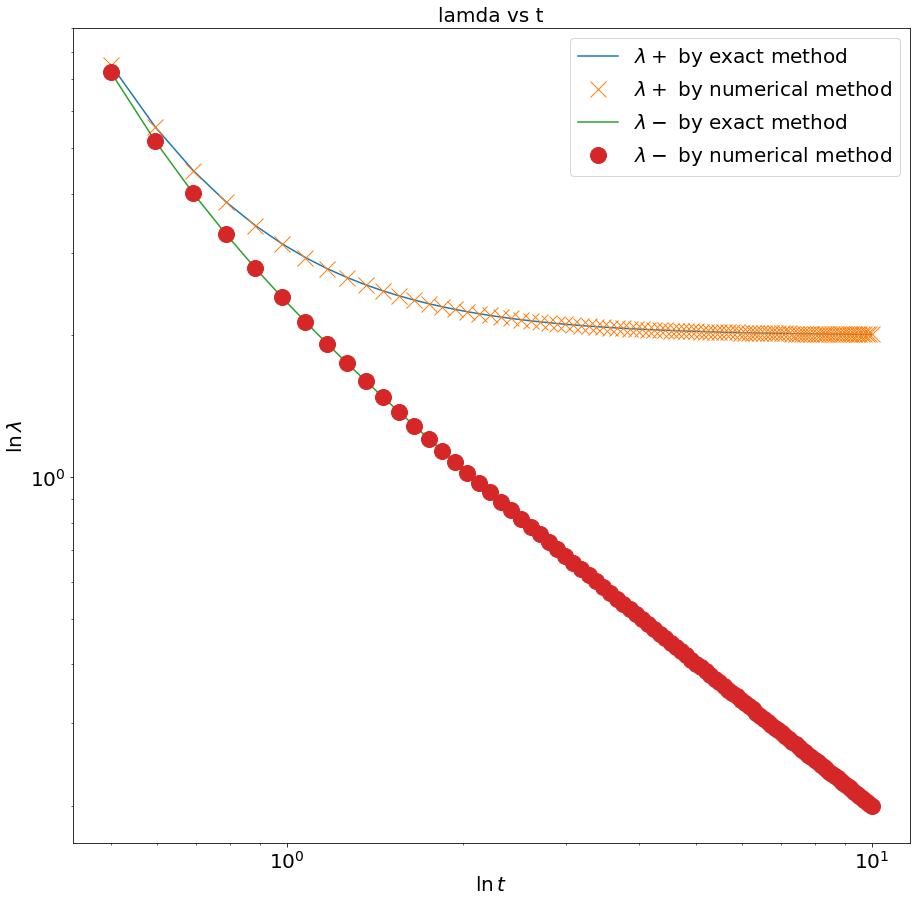

In [6]:
temperature = np.linspace(0.5,10,100)
# print(temperature)
lambda_p_numerical = []
lambda_n_numerical = []
for t in temperature:
    eigcvle, eigfn = np.linalg.eig(T(t, 1, 0))
    lambda_p_numerical.append(eigcvle[0])
    lambda_n_numerical.append(eigcvle[1])


plt.figure(figsize=(15,15))
plt.title("lamda vs t", fontsize=20)
y=[lamda_p(i, 1, 0) for i in temperature]
plt.plot(temperature, y, label = "$\lambda+$ by exact method")
plt.plot(temperature, lambda_p_numerical, 'x', label = "$\lambda+$ by numerical method" ,markersize=16)
y=[lamda_n(i, 1, 0) for i in temperature]
plt.plot(temperature, y, label = "$\lambda-$ by exact method")
plt.plot(temperature, lambda_n_numerical, 'o', label = "$\lambda-$ by numerical method" ,markersize=16)
plt.legend(loc="best",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("$\ln t$",fontsize=20)
plt.ylabel("$\ln{\lambda}$", fontsize=20)
plt.loglog()

## 2D Ising Model through transfer Matrix Method

### Transfer Matrix

In [7]:
def twoD(temperature, J, B):
    beta = 1/temperature
    
    V1 = np.zeros((4,4))

    V1[0,0] = math.exp( 4*beta*J + 2*beta*B )
    V1[0,1] = math.exp( beta*B )
    V1[0,2] = math.exp( beta*B )
    V1[0,3] = 1
    V1[1,0] = math.exp( beta*B )
    V1[1,1] = 1
    V1[1,2] = math.exp( -4*beta*J)
    V1[1,3] = math.exp( -beta*B )
    V1[2,0] = math.exp( beta*B )
    V1[2,1] = math.exp( -4*beta*J)
    V1[2,2] = 1
    V1[2,3] = math.exp( -beta*B )
    V1[3,0] = 1
    V1[3,1] = math.exp( -beta*B )
    V1[3,2] = math.exp( -beta*B )
    V1[3,3] = math.exp( 4*beta*J - 2*beta*B )
    return V1

### Plot of eigenvalues of 2D ising By ED of transfer matrix

[]

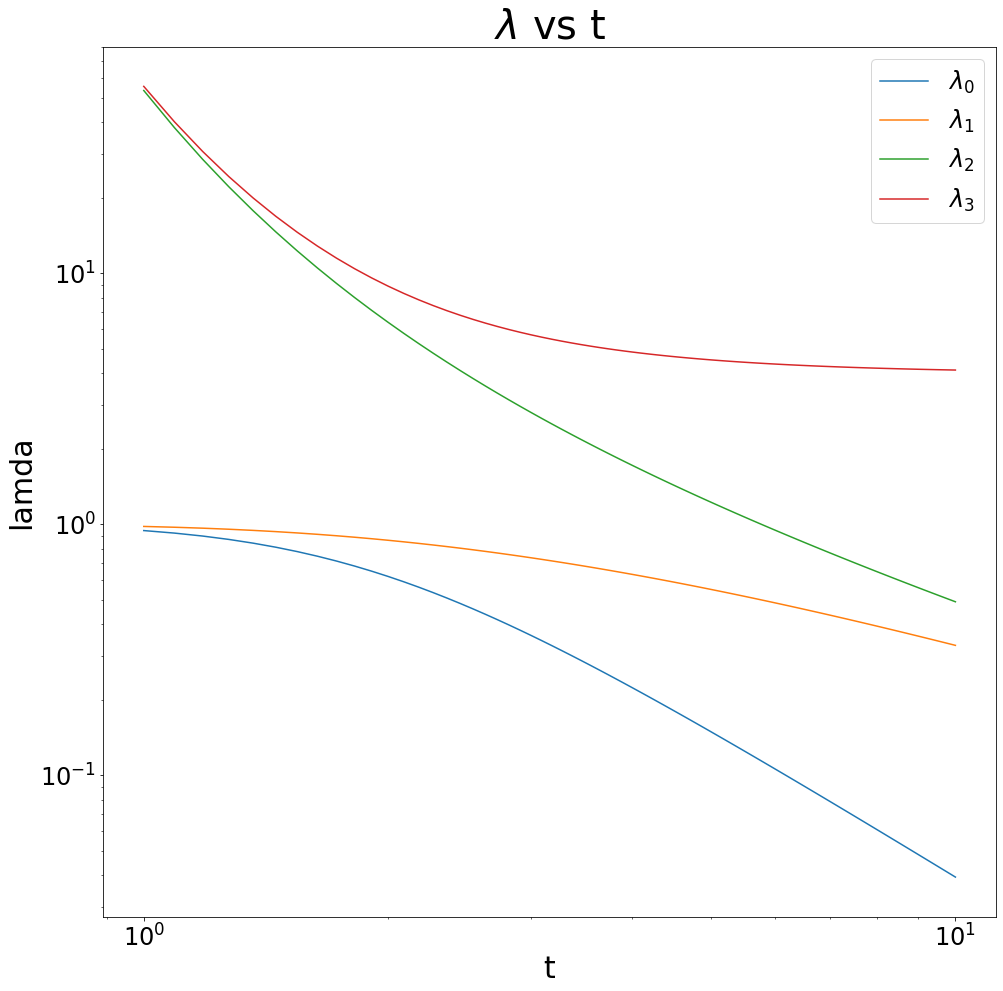

In [8]:
plt.figure(figsize=(16,16))
plt.title("$\lambda$ vs t",fontsize=40)
temperature = np.linspace(1,10,100)
y=[ np.linalg.eigvalsh(twoD(i,1,0))[0] for i in temperature]
plt.plot(temperature, y, label = "$\lambda_0$")
y=[ np.linalg.eigvalsh(twoD(i,1,0))[1] for i in temperature]
plt.plot(temperature, y, label = "$\lambda_1$")
y=[ np.linalg.eigvalsh(twoD(i,1,0))[2] for i in temperature]
plt.plot(temperature, y, label = "$\lambda_2$")
y=[ np.linalg.eigvalsh(twoD(i,1,0))[3] for i in temperature]
plt.plot(temperature, y, label = "$\lambda_3$")
plt.xlabel("t",fontsize=30)
plt.ylabel("lamda",fontsize=30)
plt.legend(loc="best",fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.loglog()

## Correlation Lenght of $L_y$=1 and $L_y$=2

### Corr length( L=1 ) = $\frac{1}{2\ln{\lambda_{3}/\lambda_{2}}}$
### Corr length( L=2 ) = $\frac{1}{\ln{\lambda_{1}/\lambda_{0}}}$

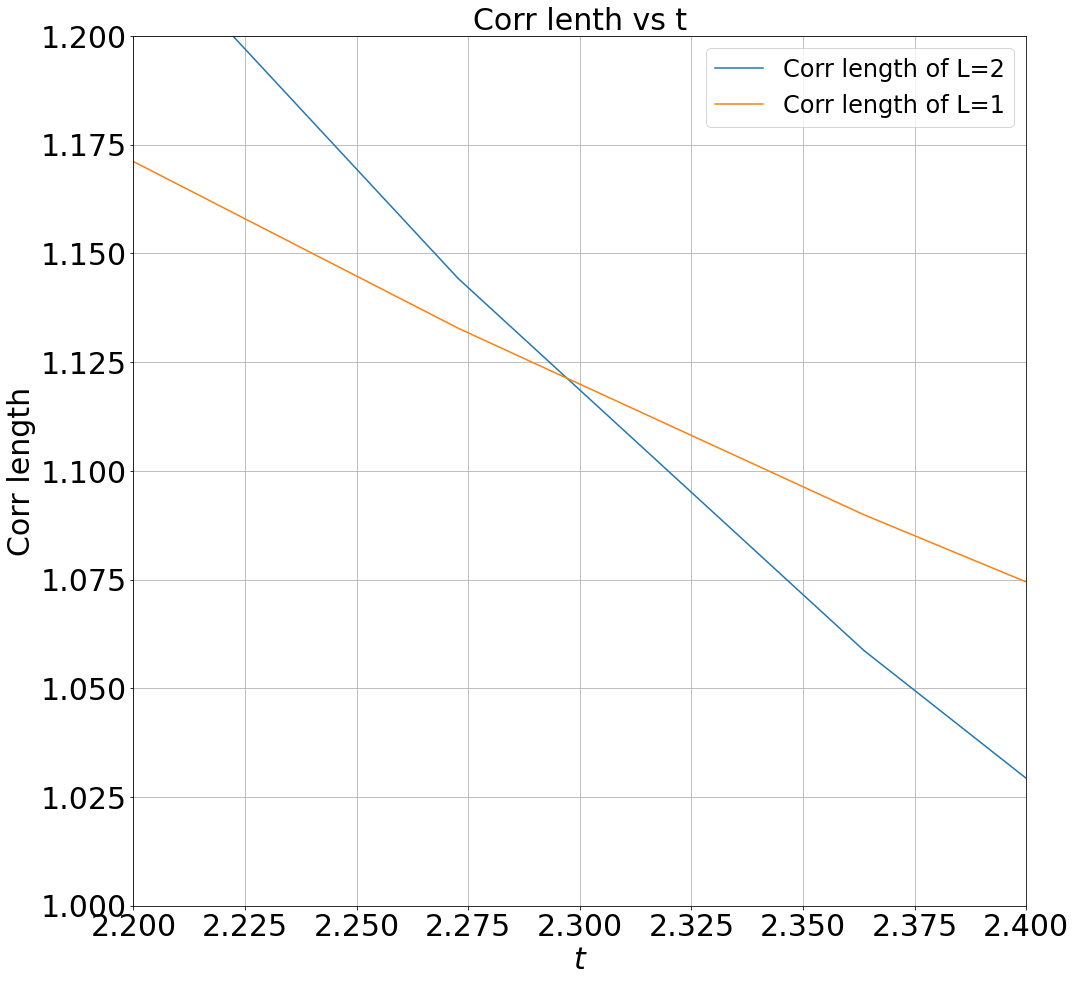

In [9]:
temperature = np.linspace(1,10,100)
xi = [ 1/np.log(np.linalg.eigvalsh(twoD(i,1,0))[3]/np.linalg.eigvalsh(twoD(i,1,0))[2])/2 for i in temperature]
plt.figure(figsize=(16,16))
plt.title("Corr lenth vs t", fontsize=30)
plt.plot(temperature, xi, label = "Corr length of L=2" )
xi = [ 1/np.log(np.linalg.eigvalsh(T(i,1,0))[1]/np.linalg.eigvalsh(T(i,1,0))[0]) for i in temperature]
plt.plot(temperature, xi, label = "Corr length of L=1" )
plt.legend(loc="best",fontsize=24)
plt.xlim(2.2,2.4)
plt.ylim(1,1.2)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("$t$",fontsize=30)
plt.ylabel("Corr length", fontsize=30)
# plt.loglog()
plt.grid()
plt.show()

# Construct transfer matrix through Tensor Methods

## Numpy Method

### 設定 M

In [10]:
t = 1
J = 1
beta = 1/t
M = np.array([[np.sqrt(math.cosh(beta*J)), np.sqrt(math.sinh(beta*J))],
                [np.sqrt(math.cosh(beta*J)),-np.sqrt(math.sinh(beta*J))]])

### 用 numpy 把 M 接成 T


In [11]:
T = np.zeros((2,2,2,2))

for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                T[i,j,k,l] = np.sum(M[:,i]*M[:,j]*M[:,k]*M[:,l])
print("T_shape",np.shape(T))
print("T",T)

# M[:,0]*M[:,1]逐項相乘

T_shape (2, 2, 2, 2)
T [[[[4.76219569 0.        ]
   [0.         3.62686041]]

  [[0.         3.62686041]
   [3.62686041 0.        ]]]


 [[[0.         3.62686041]
   [3.62686041 0.        ]]

  [[3.62686041 0.        ]
   [0.         2.76219569]]]]


### T接T

In [12]:
np_TT = np.tensordot(T,T,(1,3))
np_TT = np.transpose(np_TT,(0,3,4,1,5,2))
np_TT = np_TT.reshape((4,2,4,2))
print(np.shape(np_TT))
print("np_TT",np_TT)
np.linalg.eigh( np.trace(np_TT,axis1 = 1,axis2 =  3) )


(4, 2, 4, 2)
np_TT [[[[22.6785078   0.        ]
   [ 0.         13.15411642]
   [ 0.         17.27181901]
   [13.15411642  0.        ]]

  [[ 0.         13.15411642]
   [17.27181901  0.        ]
   [13.15411642  0.        ]
   [ 0.         13.15411642]]]


 [[[ 0.         13.15411642]
   [17.27181901  0.        ]
   [13.15411642  0.        ]
   [ 0.         13.15411642]]

  [[17.27181901  0.        ]
   [ 0.         10.01809819]
   [ 0.         13.15411642]
   [10.01809819  0.        ]]]


 [[[ 0.         17.27181901]
   [13.15411642  0.        ]
   [17.27181901  0.        ]
   [ 0.         10.01809819]]

  [[13.15411642  0.        ]
   [ 0.         13.15411642]
   [ 0.         10.01809819]
   [13.15411642  0.        ]]]


 [[[13.15411642  0.        ]
   [ 0.         13.15411642]
   [ 0.         10.01809819]
   [13.15411642  0.        ]]

  [[ 0.         13.15411642]
   [10.01809819  0.        ]
   [13.15411642  0.        ]
   [ 0.          7.62972504]]]]


(array([ 0.94512664,  0.98168436, 53.59815003, 55.67133903]),
 array([[-0.60208675, -0.        ,  0.        , -0.79843068],
        [ 0.        ,  0.70710678, -0.70710678,  0.        ],
        [ 0.        , -0.70710678, -0.70710678,  0.        ],
        [ 0.79843068,  0.        ,  0.        , -0.60208675]]))

## CYTNX Method

### Print Diagram and Element

In [14]:
def ut_print(ut):
    ut.print_diagram()
    print(ut.get_block().numpy())


In [15]:
m

NameError: name 'm' is not defined

In [16]:
m_transpose

NameError: name 'm_transpose' is not defined

In [17]:
cy.linalg.Eigh(Uni_T_trace.get_block())

NameError: name 'Uni_T_trace' is not defined

In [22]:
t=1
m = np.array([[np.sqrt(np.cosh(1/t)),np.sqrt(np.sinh(1/t))],
                [np.sqrt(np.cosh(1/t)),-np.sqrt(np.sinh(1/t))]])
m_transpose = np.copy(m.transpose())
CyT_M = cy.from_numpy(m)
Uni_M = cy.UniTensor(CyT_M, rowrank = 1)
Uni_M.print_diagram()
# np.array([[np.sqrt(np.cosh(1/t)),np.sqrt(np.sinh(1/t))],[np.sqrt(np.cosh(1/t)),-np.sqrt(np.sinh(1/t))]])
CyT_M_transpose = cy.from_numpy(m_transpose)
Uni_M_transpose = cy.UniTensor(CyT_M_transpose, rowrank = 1)
Uni_M_transpose.print_diagram()

Uni_M_up = Uni_M_transpose.clone()
Uni_M_up.set_name("Uni_M_up")
ut_print(Uni_M_up)

Uni_M_left = Uni_M_transpose.clone()
Uni_M_left.set_name("Uni_M_left")
ut_print(Uni_M_left)

Uni_M_right = Uni_M.clone()
Uni_M_right.set_name("Uni_M_right")
ut_print(Uni_M_right)

Uni_M_down = Uni_M.clone()
Uni_M_down.set_name("Uni_M_down")
ut_print(Uni_M_down)

# Uni_M_up.print_diagram()
# Uni_M_down.print_diagram()
# Uni_M_left.print_diagram()
# Uni_M_right.print_diagram()

delta = np.zeros((2,2,2,2))
delta[0,0,0,0] = delta[1,1,1,1] = 1

Delta = cy.from_numpy(delta)
UniDelta = cy.UniTensor(Delta, rowrank = 2)
UniDelta.set_labels([0,1,2,3])
UniDelta.set_name("UniDelta")
ut_print(UniDelta)

M_network = cy.Network("/network/T.net")
M_network.PutUniTensors(['mu','ml','mr','md','delta'], [Uni_M_up,Uni_M_left,Uni_M_right,Uni_M_down,UniDelta])
print(M_network)
Uni_T=M_network.Launch()
Uni_T.set_name("Uni_T")
CyT_T = Uni_T.get_block()
ut_print(Uni_T)

Uni_T_trace = Uni_T.clone().Trace(0, 3)

T_network = cy.Network("TT.net")
print(T_network)

Uni_T_u =  Uni_T.clone()
Uni_T_d =  Uni_T.clone()


T_network.PutUniTensors(['T1','T2'], [Uni_T_u,Uni_T_d])
Uni_TT=T_network.Launch()
Uni_TT.set_name("Uni_TT")
# Uni_TT.print_diagram()
ut_print(Uni_TT)

Uni_TT.combineBonds([1,2])
Uni_TT.combineBonds([3,4])
Uni_TT.set_labels([0,1,2,3])
# Uni_TT.print_diagram()
ut_print(Uni_TT)

Uni_TT_trace = Uni_TT.clone().Trace(0, 3)
Uni_TT_trace.set_labels([0,1])
ut_print(Uni_TT_trace)

cy.linalg.Eigh(Uni_TT_trace.get_block())


-----------------------
tensor Name : 
tensor Rank : 2
block_form  : false
is_diag     : False
on device   : cytnx device: CPU
            -------------      
           /             \     
     0 ____| 2         2 |____ 1  
           \             /     
            -------------      
-----------------------
tensor Name : 
tensor Rank : 2
block_form  : false
is_diag     : False
on device   : cytnx device: CPU
            -------------      
           /             \     
     0 ____| 2         2 |____ 1  
           \             /     
            -------------      
-----------------------
tensor Name : Uni_M_up
tensor Rank : 2
block_form  : false
is_diag     : False
on device   : cytnx device: CPU
            -------------      
           /             \     
     0 ____| 2         2 |____ 1  
           \             /     
            -------------      
[[ 1.24220797  1.24220797]
 [ 1.08406697 -1.08406697]]
-----------------------
tensor Name : Uni_M_left
tensor Rank : 2
bl

RuntimeError: 
# Cytnx error occur at virtual void cytnx::RegularNetwork::Fromfile(const string&)
# error: 

# file : /home/travis/miniconda/envs/test-environment/conda-bld/cytnx_1614926727399/work/src/RegularNetwork.cpp (443)

### 比較 numpy 跟 Cytnx

### 比較T

In [72]:
print("Numpy Method\n",T)
print("Cytnx Method\n",Uni_T.get_block().numpy())

Numpy Method
 [[[[4.76219569 0.        ]
   [0.         3.62686041]]

  [[0.         3.62686041]
   [3.62686041 0.        ]]]


 [[[0.         3.62686041]
   [3.62686041 0.        ]]

  [[3.62686041 0.        ]
   [0.         2.76219569]]]]
Cytnx Method
 [[[[4.76219569 0.        ]
   [0.         3.62686041]]

  [[0.         3.62686041]
   [3.62686041 0.        ]]]


 [[[0.         3.62686041]
   [3.62686041 0.        ]]

  [[3.62686041 0.        ]
   [0.         2.76219569]]]]


In [104]:
print(T)

[[[[4.76219569 0.        ]
   [0.         3.62686041]]

  [[0.         3.62686041]
   [3.62686041 0.        ]]]


 [[[0.         3.62686041]
   [3.62686041 0.        ]]

  [[3.62686041 0.        ]
   [0.         2.76219569]]]]


In [137]:
ut_print(Uni_T)

-----------------------
tensor Name : Uni_T
tensor Rank : 4
block_form  : false
is_diag     : False
on device   : cytnx device: CPU
            -------------      
           /             \     
     0 ____| 2         2 |____ 2  
           |             |     
     1 ____| 2         2 |____ 3  
           \             /     
            -------------      
[[[[4.19452805 0.49539993]
   [0.56766764 3.66053787]]

  [[0.56766764 3.66053787]
   [4.19452805 0.49539993]]]


 [[[0.49539993 3.19452805]
   [3.66053787 0.43233236]]

  [[3.66053787 0.43233236]
   [0.49539993 3.19452805]]]]


In [12]:
print(np.trace(T,axis1 = 1,axis2 =  3))

[[8.3890561 0.       ]
 [0.        6.3890561]]


In [64]:
ut_print(Uni_T_trace)

-----------------------
tensor Name : Uni_T
tensor Rank : 2
block_form  : false
is_diag     : False
on device   : cytnx device: CPU
            -------------      
           /             \     
     0 ____| 2         2 |____ 2  
           \             /     
            -------------      
[[8.3890561  0.99079986]
 [0.99079986 6.3890561 ]]


In [66]:
np.linalg.eigh( np.trace(T,axis1 = 1,axis2 =  3) )

(array([5.52439138, 9.52439138]),
 array([[-0.70710678,  0.70710678],
        [ 0.70710678,  0.70710678]]))

In [24]:
np.linalg.eigh(Uni_T_trace.get_block().numpy())

(array([6.3890561, 8.3890561]),
 array([[0., 1.],
        [1., 0.]]))

### 比較TT

In [75]:
print("np_TT\n")
print(np_TT)
print("Uni_TT get_block\n")
print(Uni_TT.get_block())

np_TT

[[[[22.6785078   0.        ]
   [ 0.         13.15411642]
   [ 0.         17.27181901]
   [13.15411642  0.        ]]

  [[ 0.         13.15411642]
   [17.27181901  0.        ]
   [13.15411642  0.        ]
   [ 0.         13.15411642]]]


 [[[ 0.         13.15411642]
   [17.27181901  0.        ]
   [13.15411642  0.        ]
   [ 0.         13.15411642]]

  [[17.27181901  0.        ]
   [ 0.         10.01809819]
   [ 0.         13.15411642]
   [10.01809819  0.        ]]]


 [[[ 0.         17.27181901]
   [13.15411642  0.        ]
   [17.27181901  0.        ]
   [ 0.         10.01809819]]

  [[13.15411642  0.        ]
   [ 0.         13.15411642]
   [ 0.         10.01809819]
   [13.15411642  0.        ]]]


 [[[13.15411642  0.        ]
   [ 0.         13.15411642]
   [ 0.         10.01809819]
   [13.15411642  0.        ]]

  [[ 0.         13.15411642]
   [10.01809819  0.        ]
   [13.15411642  0.        ]
   [ 0.          7.62972504]]]]
Uni_TT get_block


Total elem: 64
type  : 

### 比較 TT 上下取 trace 後的 eigh

In [76]:
print("eigh check of np_TT\n")
np.linalg.eigh( np.trace(np_TT,axis1 = 1,axis2 =  3) )

eigh check of np_TT



(array([ 0.94512664,  0.98168436, 53.59815003, 55.67133903]),
 array([[-0.60208675, -0.        ,  0.        , -0.79843068],
        [ 0.        ,  0.70710678, -0.70710678,  0.        ],
        [ 0.        , -0.70710678, -0.70710678,  0.        ],
        [ 0.79843068,  0.        ,  0.        , -0.60208675]]))

In [77]:
print("eigh check of Uni_TT_trace\n")
np.linalg.eigh(Uni_TT_trace.get_block().numpy())

eigh check of Uni_TT_trace



(array([ 0.94512664,  0.98168436, 53.59815003, 55.67133903]),
 array([[-0.60208675, -0.        ,  0.        , -0.79843068],
        [ 0.        ,  0.70710678, -0.70710678,  0.        ],
        [ 0.        , -0.70710678, -0.70710678,  0.        ],
        [ 0.79843068,  0.        ,  0.        , -0.60208675]]))

In [28]:
ut_print(Uni_TT)

-----------------------
tensor Name : Uni_TT
tensor Rank : 4
block_form  : false
is_diag     : False
on device   : cytnx device: CPU
            -------------      
           /             \     
     0 ____| 2         4 |____ 2  
           |             |     
     1 ____| 4         2 |____ 3  
           \             /     
            -------------      
[[[[22.6785078   0.        ]
   [ 0.         17.27181901]
   [ 0.         13.15411642]
   [13.15411642  0.        ]]

  [[ 0.         17.27181901]
   [17.27181901  0.        ]
   [13.15411642  0.        ]
   [ 0.         10.01809819]]

  [[ 0.         13.15411642]
   [13.15411642  0.        ]
   [17.27181901  0.        ]
   [ 0.         13.15411642]]

  [[13.15411642  0.        ]
   [ 0.         10.01809819]
   [ 0.         13.15411642]
   [13.15411642  0.        ]]]


 [[[ 0.         13.15411642]
   [13.15411642  0.        ]
   [17.27181901  0.        ]
   [ 0.         13.15411642]]

  [[13.15411642  0.        ]
   [ 0.         

## T 朝Y方向一直接

### 定義 iterattion 的 function

In [73]:
def T(temperature):
    m = np.array([[np.sqrt(np.cosh(1/temperature)),np.sqrt(np.sinh(1/temperature))],
                    [np.sqrt(np.cosh(1/temperature)),-np.sqrt(np.sinh(1/temperature))]])
    Cyt_M = cy.from_numpy(m)
    Uni_M = cy.UniTensor(Cyt_M, rowrank = 1)
    # Uni_M.print_diagram()

    m_transpose = np.array([[np.sqrt(np.cosh(1/temperature)),np.sqrt(np.cosh(1/temperature))],
                            [np.sqrt(np.sinh(1/temperature)),-np.sqrt(np.sinh(1/temperature))]])
                            
    Cyt_M_transpose = cy.from_numpy(m_transpose)
    Uni_M_transpose = cy.UniTensor(Cyt_M_transpose, rowrank = 1)
    # Uni_M_transpose.print_diagram()

    Uni_M_up = Uni_M.clone()
    # ut_print(Uni_M_up)

    Uni_M_down = Uni_M_transpose.clone()
    # ut_print(Uni_M_down)

    Uni_M_left = Uni_M.clone()
    # ut_print(Uni_M_left)

    Uni_M_right = Uni_M_transpose.clone()
    # ut_print(Uni_M_right)

    # Uni_M_up.print_diagram()
    # Uni_M_down.print_diagram()
    # Uni_M_left.print_diagram()
    # Uni_M_right.print_diagram()

    delta = np.zeros((2,2,2,2))
    delta[0,0,0,0] = delta[1,1,1,1] = 1

    Delta = cy.from_numpy(delta)
    UniDelta = cy.UniTensor(Delta, rowrank = 2)

    # UniDelta.print_diagram()
    # ut_print(UniDelta)

    M_network = cy.Network("UTUTT.net")
    M_network.PutUniTensors(['mu','md','mr','ml','delta'], [Uni_M_up,Uni_M_down,Uni_M_right,Uni_M_left,UniDelta])
    # print(M_network)
    Uni_T=M_network.Launch()
    Uni_T.set_name("Uni_T")
    Cyt_T = Uni_T.get_block()

    return Uni_T, Cyt_T


In [1]:
def T(temperature):

    m = np.array([[np.sqrt(np.cosh(1/temperature)),np.sqrt(np.sinh(1/temperature))],
                    [np.sqrt(np.cosh(1/temperature)),-np.sqrt(np.sinh(1/temperature))]])
    m_transpose = np.copy(m.transpose())
    CyT_M = cy.from_numpy(m)
    Uni_M = cy.UniTensor(CyT_M, rowrank = 1)
    # Uni_M.print_diagram()
    # np.array([[np.sqrt(np.cosh(1/t)),np.sqrt(np.sinh(1/t))],[np.sqrt(np.cosh(1/t)),-np.sqrt(np.sinh(1/t))]])
    CyT_M_transpose = cy.from_numpy(m_transpose)
    Uni_M_transpose = cy.UniTensor(CyT_M_transpose, rowrank = 1)
    Uni_M_transpose.print_diagram()

    Uni_M_up = Uni_M_transpose.clone()
    Uni_M_up.set_name("Uni_M_up")
    # ut_print(Uni_M_up)

    Uni_M_left = Uni_M_transpose.clone()
    Uni_M_left.set_name("Uni_M_left")
    # ut_print(Uni_M_left)

    Uni_M_right = Uni_M.clone()
    Uni_M_right.set_name("Uni_M_right")
    # ut_print(Uni_M_right)

    Uni_M_down = Uni_M.clone()
    Uni_M_down.set_name("Uni_M_down")
    # ut_print(Uni_M_down)

    # Uni_M_up.print_diagram()
    # Uni_M_down.print_diagram()
    # Uni_M_left.print_diagram()
    # Uni_M_right.print_diagram()

    delta = np.zeros((2,2,2,2))
    delta[0,0,0,0] = delta[1,1,1,1] = 1

    Delta = cy.from_numpy(delta)
    UniDelta = cy.UniTensor(Delta, rowrank = 2)
    UniDelta.set_labels([0,1,2,3])
    UniDelta.set_name("UniDelta")
    ut_print(UniDelta)

    M_network = cy.Network("/network/T.net")
    M_network.PutUniTensors(['mu','ml','mr','md','delta'], [Uni_M_up,Uni_M_left,Uni_M_right,Uni_M_down,UniDelta])
    print(M_network)
    Uni_T=M_network.Launch()
    Uni_T.set_name("Uni_T")
    Cyt_T = Uni_T.get_block()

    return Uni_T, Cyt_T


### 計算

In [ ]:
L=8
t = np.linspace(1,3,81)
y = np.linspace(0,L-1,L,dtype=int)
corr = np.zeros((L,81),dtype=float)
Lambda = np.zeros((L,2))
# round = list(range(3,L,1))
for l in range(y)
    for t_i in range(len(t)):

        temperature = t[t_i]
        Uni_TU, Cyt_T = T(temperature)
        
        if(l==0):
            Uni_TD = Uni_TU.clone()
            T_network = cy.Network("./network/Ymerge.net")
            T_network.PutUniTensors(['TU','TD'], [Uni_TU,Uni_TD])
            Uni_TYmerge=T_network.Launch()
            Uni_TYmerge.set_name("Uni_TYmerge")
            if(t_i == 1):   
                Uni_TYmerge.print_diagram()
            Uni_TYmerge_trace = Uni_TYmerge.Trace(0, 3)
            if(t_i == 1):   
                Uni_TYmerge_trace.print_diagram()
        else:
            Uni_TD = Uni_TYmerge.clone()

        Uni_T_trace = Uni_T.Trace(0, 3)

        if(t_i == 1):   
            Uni_T_trace.print_diagram()

        ee,ev = np.linalg.eigh(Uni_T_trace.get_block().numpy())
        Lambda[l,0] = np.sort(ee)[-1]
        Lambda[l,1] = np.sort(ee)[-2]
        corr[l,t_i] = 1/np.log(Lambda[l,0]/Lambda[l,1])
        # print(np.sort(ee))
        # print("lambdaStore",lambdaStore[1,:])
        T_network = cy.Network("./network/Ymerge.net")
        T_network.PutUniTensors(['TU','TD'], [Uni_TU,Uni_TD])
        Uni_TYmerge=T_network.Launch()
        Uni_TYmerge.set_name("Uni_TYmerge")

        Uni_TYmerge.combineBonds([1,2])
        Uni_TYmerge.combineBonds([3,4])
        Uni_TYmerge.set_Label(0,1,2,3)

        Uni_TYmerge_trace = Uni_TYmerge.clone().Trace(0, 3)

In [74]:
L=8
t = np.linspace(1,3,81)
corr = np.zeros((L,81),dtype=float)
# round = list(range(3,L,1))
for t_i in range(len(t)):

    temperature = t[t_i]
    Uni_T, Cyt_T = T(temperature)
    
    lambdaStore = np.zeros((L,2))

    Uni_T_trace = Uni_T.Trace(0, 3)

    if(t_i == 1):   
        Uni_T_trace.print_diagram()

    ee,ev = np.linalg.eigh(Uni_T_trace.get_block().numpy())
    lambdaStore[0,0] = np.sort(ee)[-1]
    lambdaStore[0,1] = np.sort(ee)[-2]
    corr[0,t_i] = 1/np.log(lambdaStore[0,0]/lambdaStore[0,1])
    # print(np.sort(ee))
    # print("lambdaStore",lambdaStore[1,:])
    T_network = cy.Network("./network/Ymerge.net")
    T_network.PutUniTensors(['T1','T2'], [Uni_T,Uni_T])
    Uni_TT=T_network.Launch()
    Uni_TT.set_name("Uni_TT")

    Uni_TT.combineBonds([1,2])
    Uni_TT.combineBonds([3,4])

    Uni_TT_trace = Uni_TT.Trace(0, 3)

    if(t_i == 1):   
        Uni_TT_trace.print_diagram()

    ee,ev = np.linalg.eigh(Uni_TT_trace.get_block().numpy())
    lambdaStore[1,0] = np.sort(ee)[-1]
    lambdaStore[1,1] = np.sort(ee)[-2]
    corr[1,t_i] = 1/np.log(lambdaStore[1,0]/lambdaStore[1,1])/2

    # print(np.sort(ee))
    # print("lambdaStore",lambdaStore[1,:])

    # T_TT_network = cy.Network("TT.net")
    T_network.PutUniTensors(['T1','T2'], [Uni_T,Uni_TT])
    Uni_TN=T_network.Launch().clone()
    Uni_TN.set_name("Uni_TN")

    Uni_TN.combineBonds([1,4])
    Uni_TN.combineBonds([2,5])

    # ut_print(Uni_TN)

    Uni_TN_trace = Uni_TN.Trace(0, 3)

    if(t_i == 1):   
        Uni_TN_trace.print_diagram()

    ee,ev = np.linalg.eigh(Uni_TN_trace.get_block().numpy())
    lambdaStore[2,0] = np.sort(ee)[-1]
    lambdaStore[2,1] = np.sort(ee)[-2]
    # print("ee",ee)
    # print("lambdaStore[2,0]",lambdaStore[2,0])
    # print("lambdaStore[2,1]",lambdaStore[2,1])

    corr[2,t_i] = 1/np.log(lambdaStore[2,0]/lambdaStore[2,1])/3

    for k in np.linspace(3,L-1,L-3).astype(int):
        T_network.PutUniTensors(['T1','T2'], [Uni_T,Uni_TN])
        Uni_TN=T_network.Launch().clone()
        Uni_TN.set_name("Uni_TN")

        Uni_TN.combineBonds([1,4])
        Uni_TN.combineBonds([2,5])

        # ut_print(Uni_TN)

        Uni_TN_trace = Uni_TN.Trace(0, 3)

        if(t_i == 1):   
            Uni_TN_trace.print_diagram()

        ee,ev = np.linalg.eigh(Uni_TN_trace.get_block().numpy())
        lambdaStore[k,0] = np.sort(ee)[-1]
        lambdaStore[k,1] = np.sort(ee)[-2]
        # print("ee",ee)
        # print("lambdaStore[2,0]",lambdaStore[2,0])
        # print("lambdaStore[2,1]",lambdaStore[2,1])

        corr[k,t_i] = 1/np.log(lambdaStore[k,0]/lambdaStore[k,1])/(k+1)




RuntimeError: 
# Cytnx error occur at virtual void cytnx::RegularNetwork::Fromfile(const string&)
# error: [Network] Error in opening file '
# file : /home/travis/miniconda/envs/test-environment/conda-bld/cytnx_1614926727399/work/src/RegularNetwork.cpp (303)

In [22]:
L

8

### 做圖

TypeError: 'int' object is not iterable

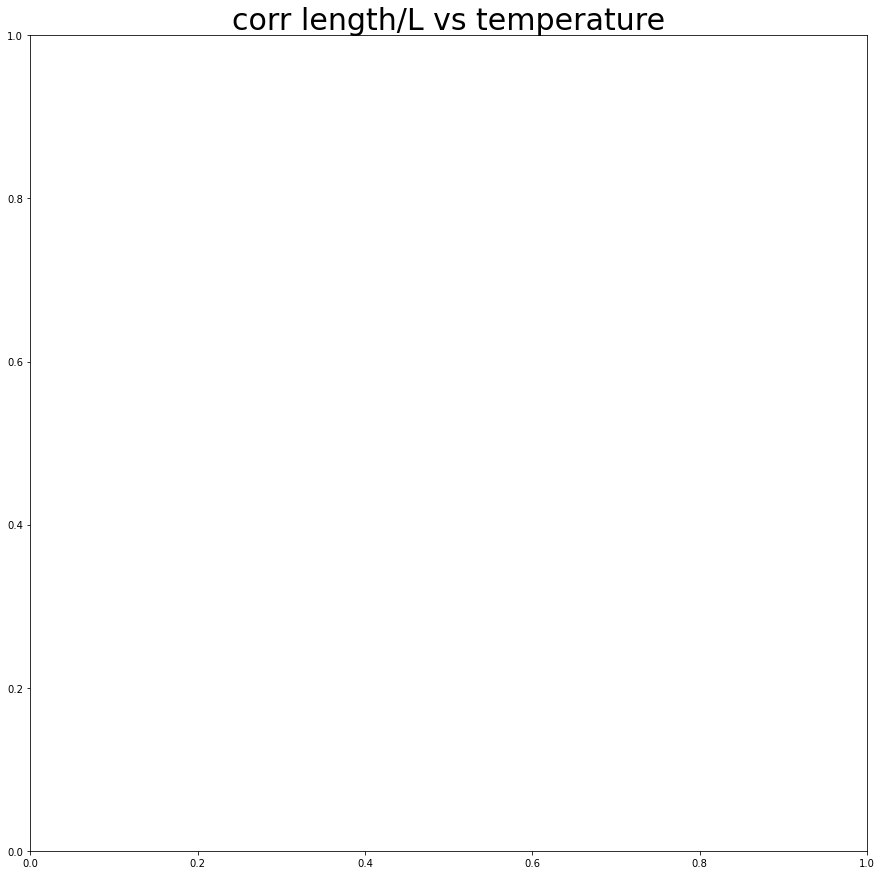

In [23]:
plt.figure(figsize = (15,15))
plt.title("corr length/L vs temperature", fontsize = 30)
for l in L:
    # if(l==0):
    #     continue
    plt.plot(t, corr[l,:], label = "L=%d" %(l+1))

plt.xlim(2.26,2.38)
plt.xticks(fontsize = 20 )
plt.xlabel("t",fontsize = 25)
plt.ylim(1.05,1.3)
plt.yticks(fontsize = 20 )
plt.ylabel("corr length/L",fontsize = 25)
plt.legend(fontsize = 20)

In [ ]:
t = np.linspace(1,3,81)
Xintersection = np.zeros(len(corr[:,0]) - 1)
Yintersection = np.zeros(len(corr[:,0]) - 1)

L = np.linspace(1,len(corr[:,0]) - 1,len(corr[:,0]) - 1,dtype=int)
for l in range(len(L)):
    for t_i in range(len(corr[0,:])-1):
        # print("(corr[l+1,t]-corr[l,t])*(corr[l+1,t+1]-corr[l,t+1])",(corr[l+1,t]-corr[l,t])*(corr[l+1,t+1]-corr[l,t+1]))
        if((corr[l+1,t_i]-corr[l,t_i])*(corr[l+1,t_i+1]-corr[l,t_i+1]) < 0):
            y=[corr[l+1,t_i],corr[l+1,t_i+1]]
            x=[t[t_i],t[t_i+1]]
            y1=[corr[l,t_i],corr[l,t_i+1]]
            x1=[t[t_i],t[t_i+1]]
            fit1 = np.polyfit(x,y,1)
            fit2 = np.polyfit(x1,y1,1)
            root = np.roots(fit1-fit2)
            Xintersection[l]=root[0]
            # Yintersection[l-1]=fit1[1]+root[0]*fit1[0]

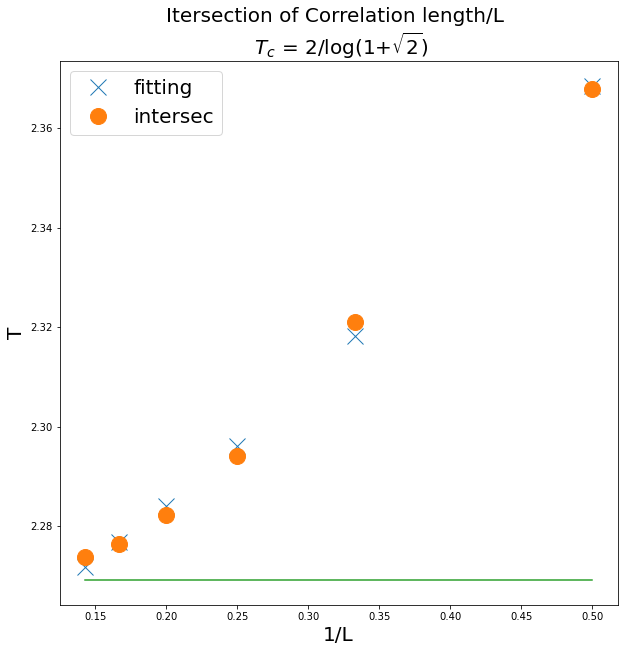

In [ ]:
L_inverse = []
Tc = []
for i in L:
    L_inverse.append(1/i)
    Tc.append(2/np.log(1 + np.sqrt(2)))
    # L = np.linspace(1,len(corr[:,0]) - 2, len(corr[:,0]) - 2,dtype=int)
def func(x, a, mu, pc):
    return a * x ** mu + pc
# nonlinear_extraparameter = np.zeros((len(y),3))
# for j in range(len(y)):
popt, pcov = curve_fit(func, L_inverse[1:7], Xintersection[1:7], maxfev=40000)
y = func(L_inverse[1:7],*popt) 

plt.figure(figsize=(10,10))
plt.plot(L_inverse[1:7],y[:],"x", label = "fitting",markersize=16)
plt.plot(L_inverse[1:7],Xintersection[1:7],"o", label = "intersec",markersize=16)
plt.plot(L_inverse[1:7],Tc[1:7])
plt.title("Itersection of Correlation length/L \n $T_c$ = 2/log(1+$\sqrt{2}$)", fontsize = 20)
plt.xlabel("1/L", fontsize = 20)
plt.ylabel("T", fontsize = 20)
plt.legend(loc = "best", fontsize=20)

## T往XY方向都接 ( T22, T44, T88 )

### T22


In [ ]:
Uni_TT.print_diagram()
Uni_TT_left = Uni_TT.set_labels([0,1,2,3]).clone()
Uni_TT_right = Uni_TT.set_labels([0,1,3,2]).clone()

Uni_TT_left.print_diagram()
Uni_TT_right.print_diagram()

Uni_TT_left.permute_([0,1,3,2],rowrank=3,by_label=True)
Uni_TT_right.permute_([3,0,1,2],rowrank=1,by_label=True)

Uni_TT_left.print_diagram()
Uni_TT_right.print_diagram()

Uni_TT_left.set_labels([0,1,2,3]).clone()
Uni_TT_right.set_labels([0,1,3,2]).clone()

Uni_TT_left.print_diagram()
Uni_TT_right.print_diagram()

T22_network = cy.Network("T22.net")
T22_network.PutUniTensors(["T1","T2"],[Uni_TT_left,Uni_TT_right])
Uni_T22 = T22_network.Launch()
ut_print(Uni_T22)

Uni_T22.combineBonds([0,4])
Uni_T22.combineBonds([2,6])
ut_print(Uni_T22)

Uni_T22_trace = Uni_T22.Trace(0, 2)

e22, ev22 = cy.linalg.Eigh(Uni_T22_trace.get_block())

# Uni_TT.permute_([1,0,3,2],rowrank=1,by_label=True)
# # Cyt_TT = Uni_TT.get_block()
# # Cyt_TT = Cyt_TT.permute([1,0,3,2])
# Uni_TT.print_diagram()
# Uni_TT.set_labels([0,1,2,3])
# Uni_TT.print_diagram()





-----------------------
tensor Name : Uni_TT
tensor Rank : 4
block_form  : false
is_diag     : False
on device   : cytnx device: CPU
            -------------      
           /             \     
     0 ____| 2         4 |____ 2  
           |             |     
     1 ____| 4         2 |____ 6  
           \             /     
            -------------      
-----------------------
tensor Name : Uni_TT
tensor Rank : 4
block_form  : false
is_diag     : False
on device   : cytnx device: CPU
            -------------      
           /             \     
     0 ____| 2         4 |____ 2  
           |             |     
     1 ____| 4         2 |____ 3  
           \             /     
            -------------      
-----------------------
tensor Name : Uni_TT
tensor Rank : 4
block_form  : false
is_diag     : False
on device   : cytnx device: CPU
            -------------      
           /             \     
     0 ____| 2         4 |____ 3  
           |             |     
     1 ___

In [ ]:
# Uni_TT.print_diagram()
e12, ev12 = cy.linalg.Eigh(Uni_TT_trace.get_block())



In [ ]:
for i in range(4):
    print(e12.numpy()[i]**2)

print("\n")
for i in range(4):
    print(e22.numpy()[i])


0.13044463407034546
0.5422891749913479
7.804580305783532
32.44548497790016


0.13044463407034557
0.5422891749913483
7.804580305783535
32.44548497790016


In [ ]:
ut_print(Uni_TT)
Uni_TT_r = Uni_TT.clone()
Uni_TT_l = Uni_TT.clone()

T22 = cy.Network("T22.net")
T22.PutUniTensors(['T1','T2'], [Uni_TT_l,Uni_TT_r])
Uni_T22 = T22.Launch()
ut_print(Uni_T22)
# Uni_T22.combineBonds([0,4])
# Uni_T22.combineBonds([3,6])
# ut_print(Uni_T22)
Uni_T22.combineBonds([0,4])
Uni_T22.combineBonds([3,6])
ut_print(Uni_T22)

# T_network.PutUniTensors(['T1','T2'], [Uni_TT_r,Uni_TT_l])
# Uni_TT=T_network.Launch()
# Uni_TT.set_name("Uni_TT")
# # Uni_TT.print_diagram()
# ut_print(Uni_TT)


-----------------------
tensor Name : Uni_TT
tensor Rank : 4
block_form  : false
is_diag     : False
on device   : cytnx device: CPU
            -------------      
           /             \     
     0 ____| 2         4 |____ 3  
           |             |     
     1 ____| 4         2 |____ 2  
           \             /     
            -------------      
[[[[4.97546742 0.        ]
   [0.         1.59967615]
   [0.         0.51431626]
   [0.51431626 0.        ]]

  [[0.         1.59967615]
   [1.59967615 0.        ]
   [0.51431626 0.        ]
   [0.         0.16535923]]

  [[0.         0.51431626]
   [0.51431626 0.        ]
   [1.59967615 0.        ]
   [0.         0.51431626]]

  [[0.51431626 0.        ]
   [0.         0.16535923]
   [0.         0.51431626]
   [0.51431626 0.        ]]]


 [[[0.         0.51431626]
   [0.51431626 0.        ]
   [1.59967615 0.        ]
   [0.         0.51431626]]

  [[0.51431626 0.        ]
   [0.         0.16535923]
   [0.         0.51431626]
   [

RuntimeError: 
# Cytnx error occur at virtual void cytnx::RegularNetwork::PutUniTensor(const cytnx_uint64&, const cytnx::UniTensor&, const bool&)
# error: [ERROR][RegularNetwork][PutUniTensor] tensor name: [T1], the row-rank of input UniTensor does not match the semicolon defined in network file.

# file : /home/travis/miniconda/envs/test-environment/conda-bld/cytnx_1614926727399/work/src/RegularNetwork.cpp (461)

In [ ]:
Uni_T22_trace=Uni_T22.Trace(1,5,by_label = True)
ee,ev=la.eigh(Uni_T22_trace.get_block().numpy())
ee

array([ 0.13044463,  0.54228917,  7.80458031, 32.44548498])

In [ ]:
ee,ev=la.eigh(Uni_TT_trace.get_block().numpy())
ee


array([0.3611712 , 0.73640286, 2.79366789, 5.69609384])

In [ ]:
ee[2]**2

7.804580305783534